# Exercise 1: Exploring the Sea Surface Temperature Dataset
Load the sea surface temperature dataset from the NetCDF file (sea_surface_temperature.nc).

Inspect the Dataset object and list all the available variables and dimensions in the dataset.

Select the sst variable (sea surface temperature).

Print the attributes, dimensions, and coordinates of the sst variable to understand the metadata.

This exercise allows you to practice selecting specific subsets of data and visualizing SST patterns over a specified period.

In [3]:
import xarray as xr
import numpy as np
from matplotlib import pyplot as plt
import pooch

xr.set_options(keep_attrs=True, display_expand_data=False)
np.set_printoptions(threshold=10, edgeitems=2)

In [4]:
# Load data set from "https://github.com/opengeos/datasets/releases/download/netcdf/sea_surface_temperature.nc"

file_path = "https://github.com/opengeos/datasets/releases/download/netcdf/sea_surface_temperature.nc"
data = pooch.retrieve(url=file_path, known_hash=None, fname="sea_surface_temperature.nc", path="data")

In [ ]:
#Inspect the Dataset object and list all the available variables and dimensions in the dataset.

ds=xr.open_dataset(data)
ds

d:\Trainings\newgeoenv\Lib\site-packages\xarray\conventions.py:200: SerializationWarning: variable 'sst' has multiple fill values {-999000000.0, -9999.0} defined, decoding all values to NaN.
  var = coder.decode(var, name=name)


<xarray.Dataset> Size: 149MB
Dimensions:  (lon: 720, lat: 360, time: 72)
Coordinates:
  * lon      (lon) float64 6kB 0.25 0.75 1.25 1.75 ... 358.2 358.8 359.2 359.8
  * lat      (lat) float64 3kB -89.75 -89.25 -88.75 -88.25 ... 88.75 89.25 89.75
  * time     (time) datetime64[ns] 576B 2010-01-01 2010-02-01 ... 2015-12-01
Data variables:
    sst      (time, lat, lon) float64 149MB ...

In [6]:
#Select the sst variable (sea surface temperature).

sea_surface=ds.sst
sea_surface


<xarray.DataArray 'sst' (time: 72, lat: 360, lon: 720)> Size: 149MB
[18662400 values with dtype=float64]
Coordinates:
  * lon      (lon) float64 6kB 0.25 0.75 1.25 1.75 ... 358.2 358.8 359.2 359.8
  * lat      (lat) float64 3kB -89.75 -89.25 -88.75 -88.25 ... 88.75 89.25 89.75
  * time     (time) datetime64[ns] 576B 2010-01-01 2010-02-01 ... 2015-12-01
Attributes:
    long_name:      Sea Surface Temperature
    units:          degrees Celsius
    standard_name:  sea_surface_temperature
    valid_range:    [-2. 35.]

In [8]:
# Print the attributes, dimensions, and coordinates of the sst variable to understand the metadata.
print(sea_surface.attrs)
print(sea_surface.dims)
print(sea_surface.coords)

{'long_name': 'Sea Surface Temperature', 'units': 'degrees Celsius', 'standard_name': 'sea_surface_temperature', 'valid_range': array([-2., 35.])}
('time', 'lat', 'lon')
Coordinates:
  * lon      (lon) float64 6kB 0.25 0.75 1.25 1.75 ... 358.2 358.8 359.2 359.8
  * lat      (lat) float64 3kB -89.75 -89.25 -88.75 -88.25 ... 88.75 89.25 89.75
  * time     (time) datetime64[ns] 576B 2010-01-01 2010-02-01 ... 2015-12-01


# Exercise 2: Data Selection and Indexing

Select a subset of the sst data for a specific time (2010-07-01) and latitude (0.0), which represents the Equator.

Create a time slice for the SST data between January and March 2010 for all latitudes and longitudes.

Plot the time slice as a line plot, showing the latitude-averaged SST over time.

This exercise allows you to practice selecting specific subsets of data and visualizing SST patterns over a specified period.

In [14]:
# Select a subset of the sst data for a specific time (2010-07-01) and latitude (0.0), which represents the Equator.
equator = sea_surface.sel(time = '2010-07-01', lat=0.0 , method='nearest')
print(equator)

<xarray.DataArray 'sst' (lon: 720)> Size: 6kB
[720 values with dtype=float64]
Coordinates:
  * lon      (lon) float64 6kB 0.25 0.75 1.25 1.75 ... 358.2 358.8 359.2 359.8
    lat      float64 8B 0.25
    time     datetime64[ns] 8B 2010-07-01
Attributes:
    long_name:      Sea Surface Temperature
    units:          degrees Celsius
    standard_name:  sea_surface_temperature
    valid_range:    [-2. 35.]


In [17]:
# Create a time slice for the SST data between January and March 2010 for all latitudes and longitudes.
time_sliced = sea_surface.sel(time = slice('1-1-2010','31-3-2010'))
print(time_sliced)

<xarray.DataArray 'sst' (time: 3, lat: 360, lon: 720)> Size: 6MB
[777600 values with dtype=float64]
Coordinates:
  * lon      (lon) float64 6kB 0.25 0.75 1.25 1.75 ... 358.2 358.8 359.2 359.8
  * lat      (lat) float64 3kB -89.75 -89.25 -88.75 -88.25 ... 88.75 89.25 89.75
  * time     (time) datetime64[ns] 24B 2010-01-01 2010-02-01 2010-03-01
Attributes:
    long_name:      Sea Surface Temperature
    units:          degrees Celsius
    standard_name:  sea_surface_temperature
    valid_range:    [-2. 35.]


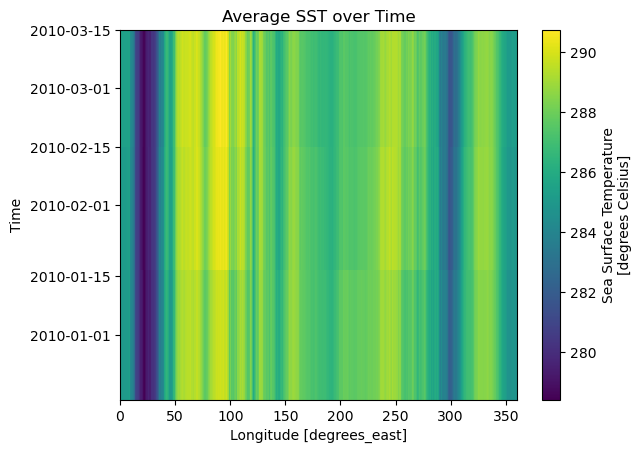

In [28]:
# Plot the time slice as a line plot, showing the latitude-averaged SST over time.
average_sst = time_sliced.mean(dim='lat')
average_sst.plot()
plt.title ("Average SST over Time")
plt.show()

# Exercise 3: Performing Arithmetic Operations

Compute the mean SST over the entire time range (2010-2015) to obtain the average sea surface temperature for each spatial location.

Calculate the temperature anomalies by subtracting the computed mean from the original SST values. This helps understand how SST deviates from the mean during the time period.

Plot both the mean SST and the anomalies on separate plots to visualize spatial temperature patterns and deviations. You can select a specific time to display the anomalies.

In [30]:
# Compute the mean SST over the entire time range (2010-2015) to obtain the average sea surface temperature for each spatial location.
mean_sst = sea_surface.sel(time = slice('2010-1-1','2015-12-31')).mean(dim='time')
print (mean_sst)

<xarray.DataArray 'sst' (lat: 360, lon: 720)> Size: 2MB
nan nan nan nan nan nan nan nan ... 271.6 271.6 271.6 271.6 271.6 271.6 271.6
Coordinates:
  * lon      (lon) float64 6kB 0.25 0.75 1.25 1.75 ... 358.2 358.8 359.2 359.8
  * lat      (lat) float64 3kB -89.75 -89.25 -88.75 -88.25 ... 88.75 89.25 89.75
Attributes:
    long_name:      Sea Surface Temperature
    units:          degrees Celsius
    standard_name:  sea_surface_temperature
    valid_range:    [-2. 35.]


In [31]:
# Calculate the temperature anomalies by subtracting the computed mean from the original SST values. This helps understand how SST deviates from the mean during the time period.
anomalies = sea_surface - mean_sst 
print(anomalies)

<xarray.DataArray 'sst' (time: 72, lat: 360, lon: 720)> Size: 149MB
nan nan nan nan nan nan nan ... -0.1009 -0.1009 -0.101 -0.1009 -0.101 -0.101
Coordinates:
  * lon      (lon) float64 6kB 0.25 0.75 1.25 1.75 ... 358.2 358.8 359.2 359.8
  * lat      (lat) float64 3kB -89.75 -89.25 -88.75 -88.25 ... 88.75 89.25 89.75
  * time     (time) datetime64[ns] 576B 2010-01-01 2010-02-01 ... 2015-12-01
Attributes:
    long_name:      Sea Surface Temperature
    units:          degrees Celsius
    standard_name:  sea_surface_temperature
    valid_range:    [-2. 35.]


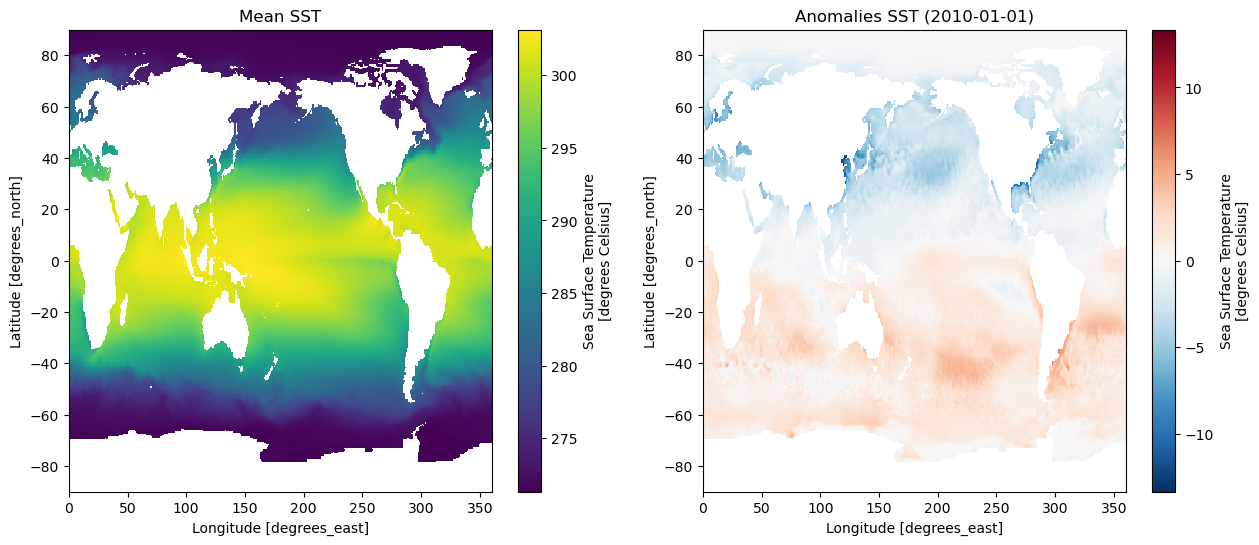

In [40]:
# Plot both the mean SST and the anomalies on separate plots to visualize spatial temperature patterns and deviations. You can select a specific time to display the anomalies.
fig, (ax1,ax2) = plt.subplots(ncols = 2,figsize = (15,6))
mean_sst.plot(ax=ax1)
ax1.set_title('Mean SST')

anomalies.isel(time=0).plot(ax=ax2)
ax2.set_title('Anomalies SST (2010-01-01)')
plt.show()